In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import kstest, skew

In [2]:
df = pd.read_csv('obesity-dataset.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
print("Gender Unique Values")
print(df['Gender'].unique(), "\n")

print("CALC Unique Values")
print(df['CALC'].unique(), "\n")

print("FAVC Unique Values")
print(df['FAVC'].unique(), "\n")

print("SCC Unique Values")
print(df['SCC'].unique(), "\n")

print("SMOKE Unique Values")
print(df['SMOKE'].unique(), "\n")

print("family_history_with_overweight Unique Values")
print(df['family_history_with_overweight'].unique(), "\n")

print("MTRANS Unique Values")
print(df['MTRANS'].unique(), "\n")

print("CAEC Unique Values")
print(df['CAEC'].unique(), "\n")

# Target Variable
print("NObeyesdad Unique Values")
print(df['NObeyesdad'].unique(), "\n")

Gender Unique Values
['Female' 'Male'] 

CALC Unique Values
['no' 'Sometimes' 'Frequently' 'Always'] 

FAVC Unique Values
['no' 'yes'] 

SCC Unique Values
['no' 'yes'] 

SMOKE Unique Values
['no' 'yes'] 

family_history_with_overweight Unique Values
['yes' 'no'] 

MTRANS Unique Values
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 

CAEC Unique Values
['Sometimes' 'Frequently' 'Always' 'no'] 

NObeyesdad Unique Values
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 



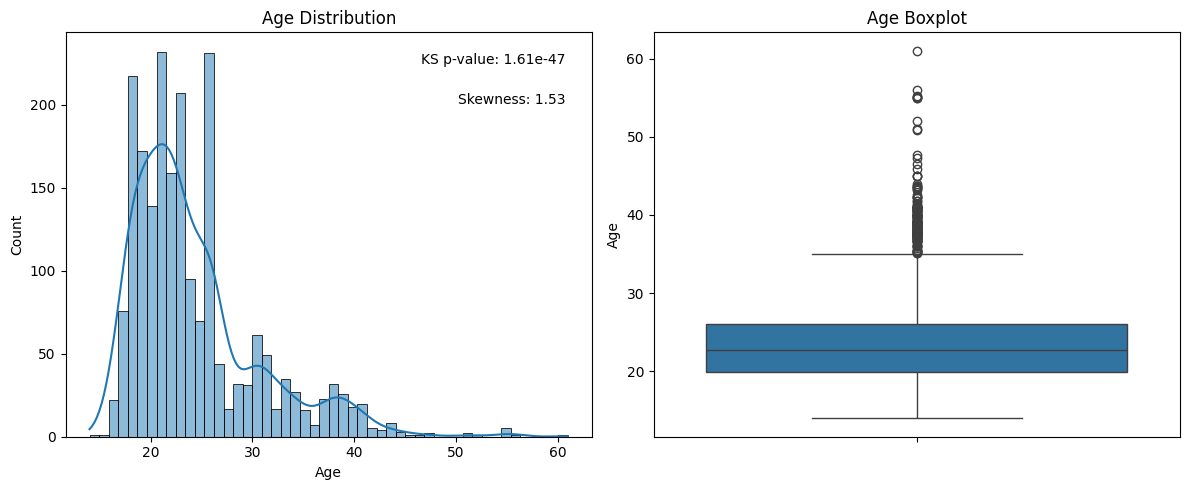

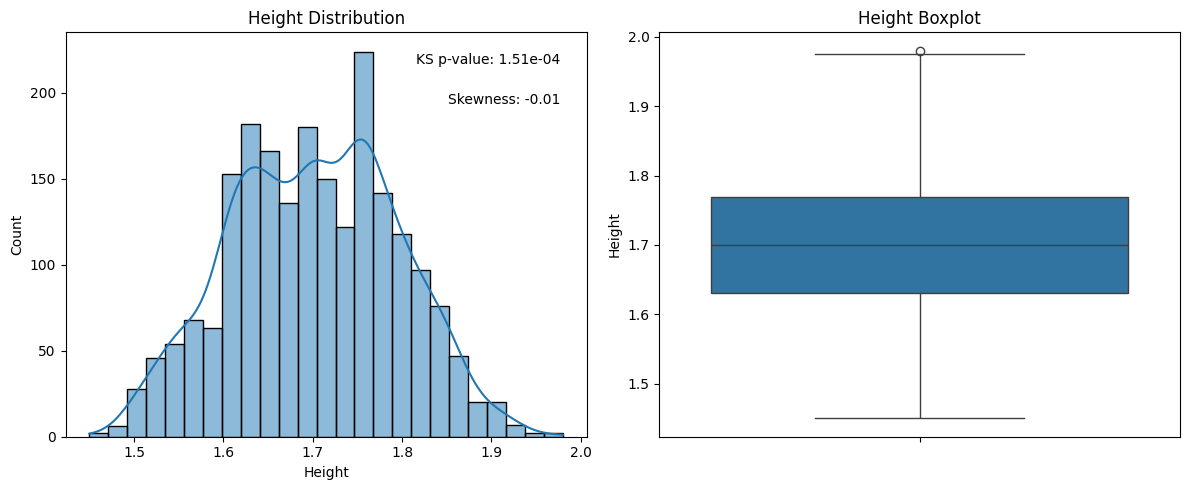

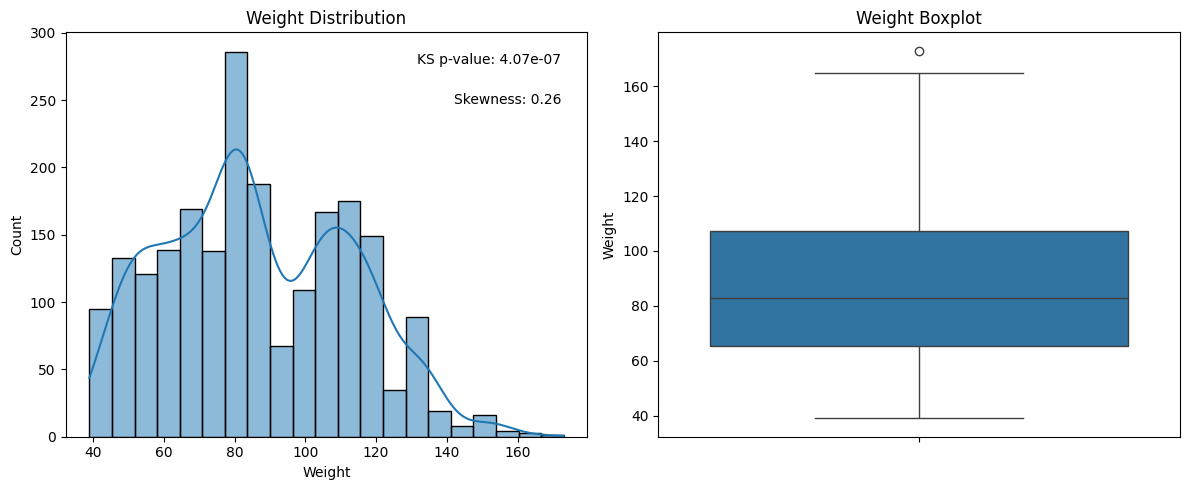

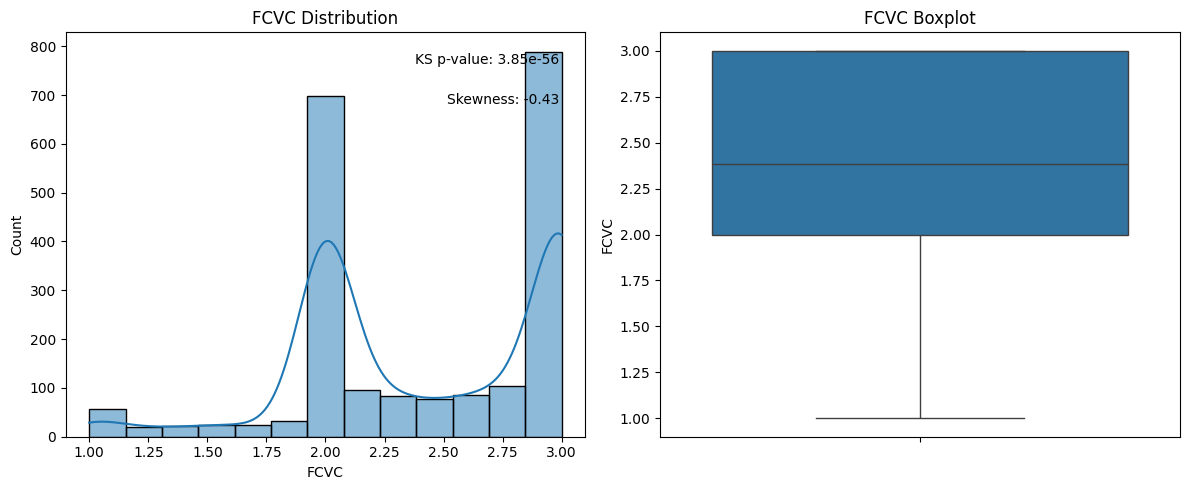

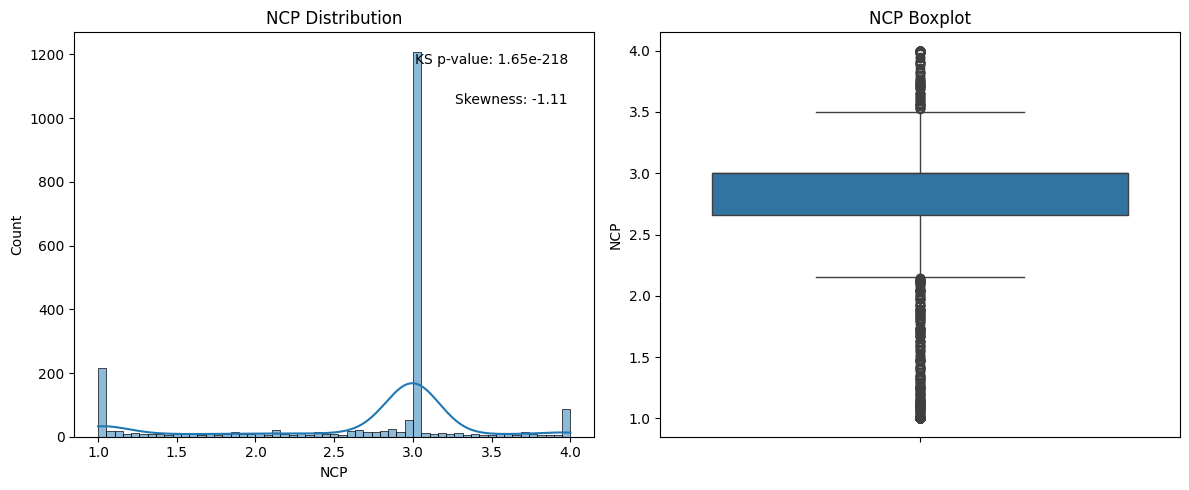

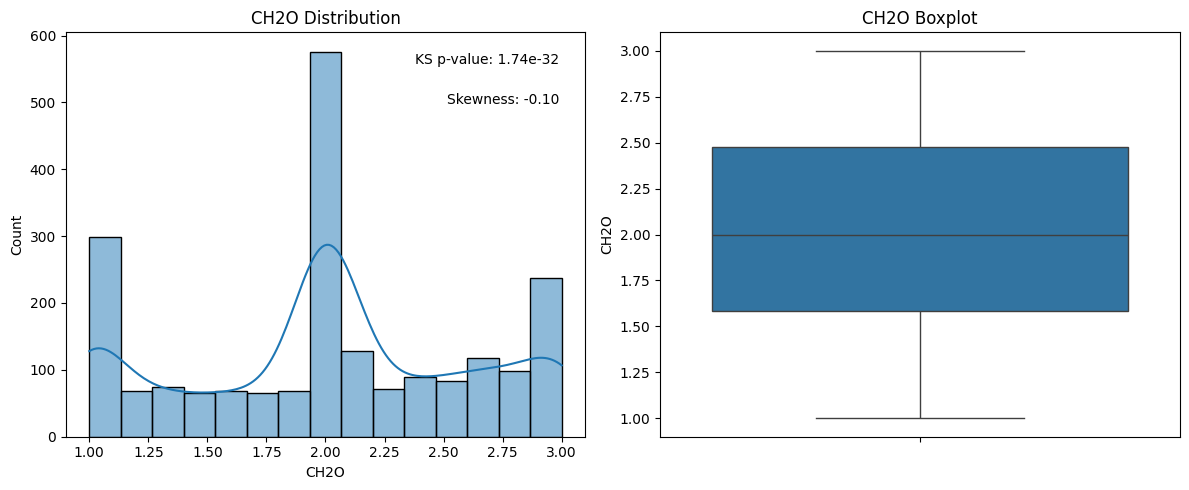

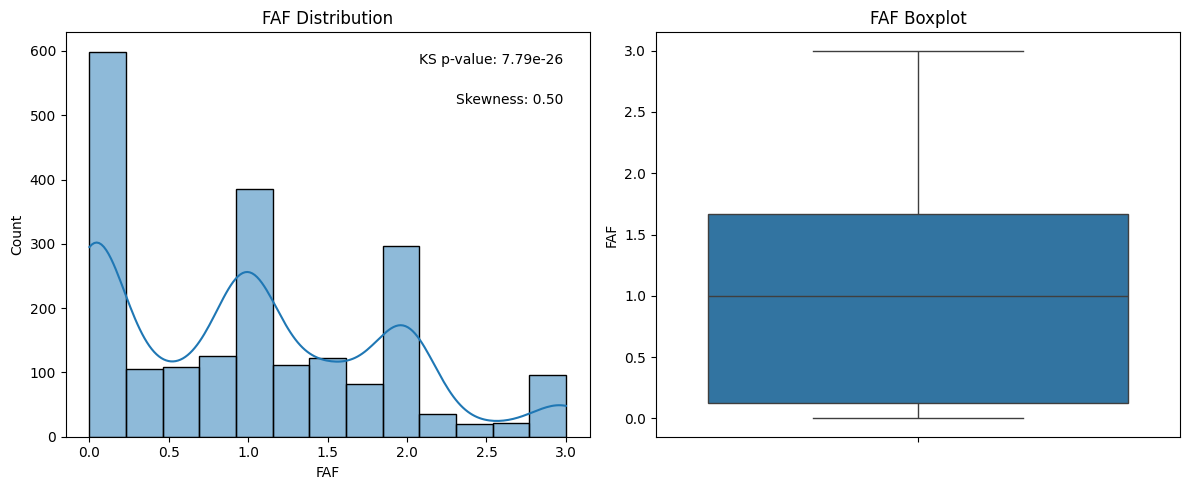

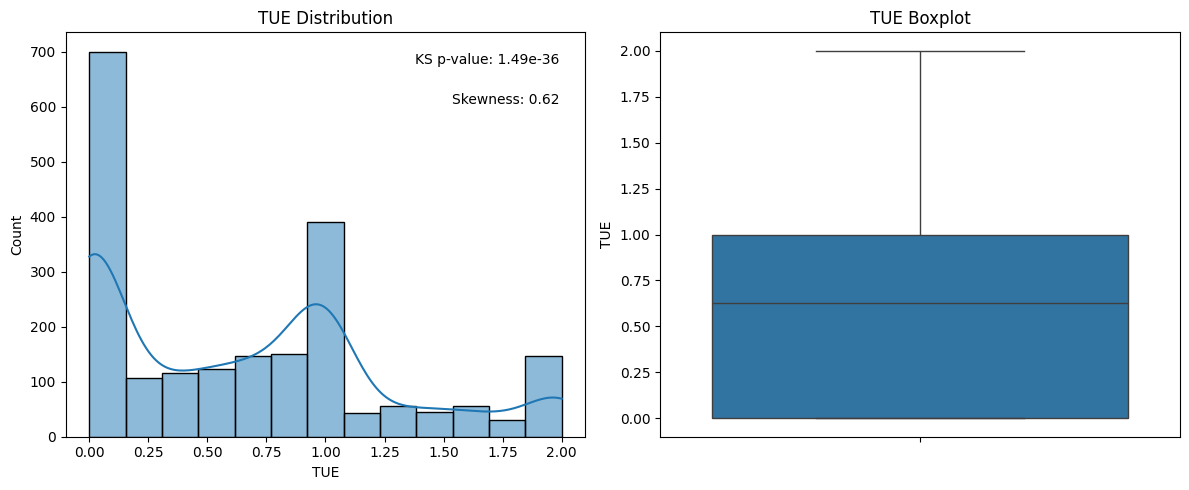

In [7]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Visualization of distribution with Kolmogorov-Smirnov test and skewness
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'{col} Distribution')
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p_value = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    ax[0].text(0.95, 0.95, f'KS p-value: {ks_p_value:.2e}', horizontalalignment='right', verticalalignment='top', transform=ax[0].transAxes)
    
    # Skewness
    col_skewness = skew(df[col])
    ax[0].text(0.95, 0.85, f'Skewness: {col_skewness:.2f}', horizontalalignment='right', verticalalignment='top', transform=ax[0].transAxes)
    
    # Boxplot
    sns.boxplot(y=df[col], ax=ax[1])
    ax[1].set_title(f'{col} Boxplot')
    
    plt.tight_layout()
    plt.show()

In [8]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Column', 'KS Statistic', 'Skewness', 'P-Value', 'Normal Distribution'])

# Populate the DataFrame with the results
for col in numerical_cols:
    ks_stat, ks_p_value = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    col_skewness = skew(df[col])
    normal_dist = ks_p_value > 0.05  # Assuming a significance level of 0.05
    
    result = pd.DataFrame({
        'Column': [col],
        'KS Statistic': [ks_stat],
        'Skewness': [col_skewness],
        'P-Value': [ks_p_value],
        'Normal Distribution': [normal_dist]
    })
    
    results = pd.concat([results, result], ignore_index=True)

# Display the results
print(results)

   Column  KS Statistic  Skewness        P-Value Normal Distribution
0     Age      0.159735  1.528014   1.607513e-47               False
1  Height      0.047334 -0.012846   1.505190e-04               False
2  Weight      0.060312  0.255229   4.065711e-07               False
3    FCVC      0.173656 -0.432598   3.847710e-56               False
4     NCP      0.340175 -1.106310  1.653595e-218               False
5    CH2O      0.131900 -0.104837   1.742840e-32               False
6     FAF      0.117464  0.498135   7.793016e-26               False
7     TUE      0.139989  0.618063   1.489976e-36               False


C:\Users\feder\AppData\Local\Temp\ipykernel_616\112411002.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [9]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
class Backpropagation:
    def __init__(self, input_size, hidden_size, output_size, activation_function='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Untuk stabilitas numerik
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)


    def feedforward(self, X):
        # Hitung aktivasi layer tersembunyi
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        if self.activation_function == 'sigmoid':
            self.hidden_output = self.sigmoid(self.hidden_activation)
        elif self.activation_function == 'relu':
            self.hidden_output = self.relu(self.hidden_activation)
        else:
            # Jika tidak menggunakan sigmoid atau ReLU, kita tetap perlu inisialisasi hidden_output
            self.hidden_output = self.hidden_activation  # Tanpa aktivasi untuk softmax

        # Hitung output layer
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        if self.activation_function == 'sigmoid':
            self.predicted_output = self.sigmoid(self.output_activation)
        elif self.activation_function == 'relu':
            self.predicted_output = self.relu(self.output_activation)
        elif self.activation_function == 'softmax':
            self.predicted_output = self.softmax(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
    # Hitung error dan delta untuk output layer
        if self.activation_function == 'sigmoid':
            output_error = y - self.predicted_output
            output_delta = output_error * self.sigmoid_derivative(self.predicted_output)
        elif self.activation_function == 'relu':
            output_error = y - self.predicted_output
            output_delta = output_error * self.relu_derivative(self.predicted_output)
        elif self.activation_function == 'softmax':
        # Untuk softmax, kita menggunakan cross-entropy loss, sehingga kita tidak membutuhkan turunan softmax
            output_error = y - self.predicted_output
            output_delta = output_error  # Tidak perlu turunan fungsi aktivasi pada softmax

    # Hitung error dan delta untuk hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        if self.activation_function == 'sigmoid':
            hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        elif self.activation_function == 'relu':
            hidden_delta = hidden_error * self.relu_derivative(self.hidden_output)
        elif self.activation_function == 'softmax':
        # Untuk softmax, tidak perlu menghitung hidden_delta karena kita tidak menghitung turunan pada output layer
            hidden_delta = hidden_error  # Saring error untuk hidden layer

    # Update bobot dan bias
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
        
        # Menghitung Cross-Entropy Loss untuk softmax
            if self.activation_function == 'softmax':
            # Cross-entropy loss: -sum(y * log(y_hat))
                loss = -np.mean(np.sum(y * np.log(output + 1e-9), axis=1))  # Tambahkan epsilon untuk menghindari log(0)
            else:
                loss = np.mean(np.square(y - output))  # Untuk sigmoid atau relu
        
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

In [12]:
def one_hot_encoder(data, column):
    one_hot_encoded = pd.get_dummies(data[column], prefix=column)
    return pd.concat([data.drop(column, axis=1), one_hot_encoded], axis=1), one_hot_encoded.columns

def one_hot_decoder(encoded_data, original_column_name, categories):
    decoded_data = encoded_data.copy()
    category_columns = categories

    decoded_data[original_column_name] = decoded_data[category_columns].idxmax(axis=1)
    decoded_data[original_column_name] = decoded_data[original_column_name].str.replace(f'{original_column_name}_', '')

    decoded_data = decoded_data.drop(columns=category_columns)
    return decoded_data

In [13]:
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 
                       'family_history_with_overweight', 'MTRANS', 'CAEC']

# One-hot encoding untuk setiap kolom kategorikal
for col in categorical_columns:
    df, encoded_columns = one_hot_encoder(df, col)
    # Menyimpan nama kolom untuk decoding nanti
    print(f"Encoded columns for {col}: {encoded_columns}")

Encoded columns for Gender: Index(['Gender_Female', 'Gender_Male'], dtype='object')
Encoded columns for CALC: Index(['CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no'], dtype='object')
Encoded columns for FAVC: Index(['FAVC_no', 'FAVC_yes'], dtype='object')
Encoded columns for SCC: Index(['SCC_no', 'SCC_yes'], dtype='object')
Encoded columns for SMOKE: Index(['SMOKE_no', 'SMOKE_yes'], dtype='object')
Encoded columns for family_history_with_overweight: Index(['family_history_with_overweight_no', 'family_history_with_overweight_yes'], dtype='object')
Encoded columns for MTRANS: Index(['MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
Encoded columns for CAEC: Index(['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no'], dtype='object')


In [14]:
df, encoded_target_columns = one_hot_encoder(df, 'NObeyesdad')

X = df.drop(encoded_target_columns, axis=1).values  # Fitur (X) adalah semua kolom kecuali target
y = df[encoded_target_columns].values  # Target (y) adalah hasil one-hot encoding dari NObeyesdad

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Normalisasi fitur X

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Tentukan ukuran input, hidden layer, dan output
input_size = X_train.shape[1]
hidden_size = 10  # Bisa disesuaikan, semakin besar bisa lebih kompleks
output_size = y_train.shape[1]  # Jumlah kelas target (kolom yang sudah di-one-hot encoding)

# Inisialisasi model dan latih
model = Backpropagation(input_size, hidden_size, output_size, activation_function='softmax')
model.train(X_train, y_train, epochs=10000, learning_rate=0.01)

Epoch 0, Loss: 14.720694547915398


C:\Users\feder\AppData\Local\Temp\ipykernel_616\423501309.py:27: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Untuk stabilitas numerik


Epoch 1000, Loss: nan
Epoch 2000, Loss: nan
Epoch 3000, Loss: nan
Epoch 4000, Loss: nan
Epoch 5000, Loss: nan
Epoch 6000, Loss: nan
Epoch 7000, Loss: nan
Epoch 8000, Loss: nan
Epoch 9000, Loss: nan


In [18]:
# Prediksi output dari data uji
y_pred = model.feedforward(X_test)

# Menghitung akurasi
y_pred_class = np.argmax(y_pred, axis=1)  # Ambil indeks dengan nilai tertinggi sebagai prediksi
y_test_class = np.argmax(y_test, axis=1)  # Ambil label asli dari data uji

accuracy = np.mean(y_pred_class == y_test_class)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

Akurasi Model: 14.11%


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Melatih model dengan fungsi aktivasi berbeda
activations = ['sigmoid', 'relu', 'softmax']
for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    model = Backpropagation(input_size, hidden_size, output_size, activation_function=activation)
    model.train(X_train, y_train, epochs=10000, learning_rate=0.01)
    
    # Evaluasi model
    y_pred = model.feedforward(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_class == np.argmax(y_test, axis=1))
    
    print(f"Akurasi Model dengan {activation}: {accuracy * 100:.2f}%")
    
    # Metrik lainnya
    print("Classification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred_class))
    print("Confusion Matrix:\n", confusion_matrix(np.argmax(y_test, axis=1), y_pred_class))



Training model with sigmoid activation...
Epoch 0, Loss: 0.3745487574995914
Epoch 1000, Loss: 0.0520642006398228
Epoch 2000, Loss: 0.038419176961391306
Epoch 3000, Loss: 0.03253146795057585
Epoch 4000, Loss: 0.02283125976779147
Epoch 5000, Loss: 0.030164093697646503
Epoch 6000, Loss: 0.014736582558357405
Epoch 7000, Loss: 0.01710472833216723
Epoch 8000, Loss: 0.012030470563960807
Epoch 9000, Loss: 0.013218752642195119
Akurasi Model dengan sigmoid: 87.80%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.79        59
           1       0.73      0.85      0.79        61
           2       1.00      0.84      0.91        70
           3       0.94      1.00      0.97        64
           4       0.98      1.00      0.99        60
           5       0.85      0.84      0.84        55
           6       0.75      0.92      0.83        49

    accuracy                           0.88       418
   macro avg       0.88     

c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1000, Loss: nan
Epoch 2000, Loss: nan
Epoch 3000, Loss: nan
Epoch 4000, Loss: nan
Epoch 5000, Loss: nan
Epoch 6000, Loss: nan
Epoch 7000, Loss: nan
Epoch 8000, Loss: nan
Epoch 9000, Loss: nan
Akurasi Model dengan softmax: 14.11%
Classification Report:
               precision    recall  f1-score   support

           0       0.14      1.00      0.25        59
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00        64
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        55
           6       0.00      0.00      0.00        49

    accuracy                           0.14       418
   macro avg       0.02      0.14      0.04       418
weighted avg       0.02      0.14      0.03       418

Confusion Matrix:
 [[59  0  0  0  0  0  0]
 [61  0  0  0  0  0  0]
 [70  0  0  0  0  0  0]
 [64  0  0  0  0  0  0]
 [60  0  0  0  0  0  0]
 [55 

c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo